># <center>Database Administration 101 Course</center>
<img src = 'https://images.spiceworks.com/wp-content/uploads/2023/05/12142314/Shutterstock_1634527660-1.jpg'>

># <center>07 / 01 / 2024<center>

# Архитектура Oracle Database
При установке базы данных Oracle, сначала устанавливается
программное обеспечение СУБД (Система Управления Базой Данных, 
DataBase Software). Помимо СУБД, необходима также сама база данных. 
Одна система управления базой данных, может работать сразу с 
несколькими базами данных на одном сервере. Каждая такая база 
данных в терминологии Oracle называется экземпляром базы данных 
(DataBase Instance). Каждый запущенный экземпляр активно использует 
ресурсы процессора, оперативной и дисковой памяти.
Далее, мы постепенно разберем что у нас хранится на дисках 
(основные файлы), какие процессы за что отвечают и собственно, что 
хранится в оперативной памяти.
Oracle Database = Oracle DataBase Software + Oracle DataBase 
Instance (s)

### Рассмотрим основные файлы Oracle DataBase.
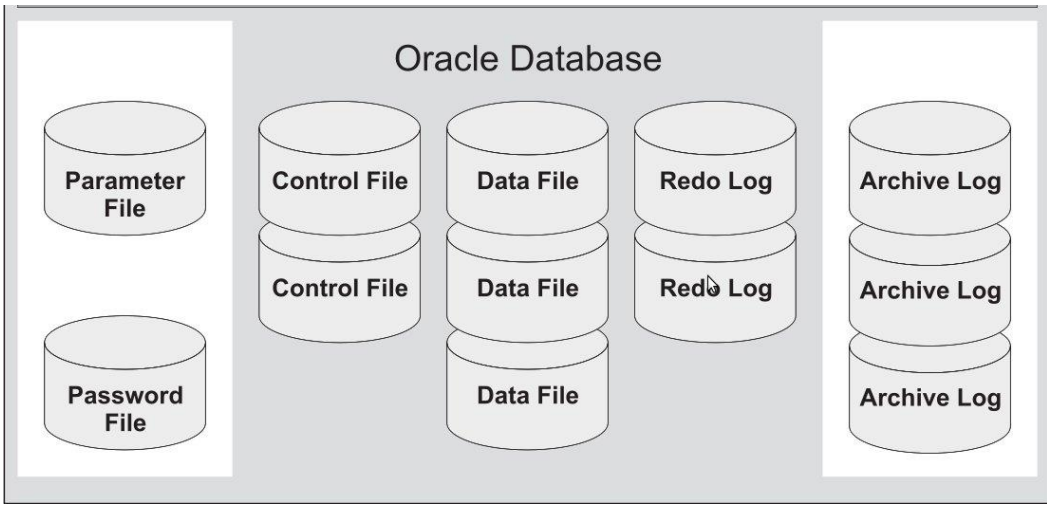

### • Файлы данных (datafiles). 
Все данные в базе данных Oracle сохраняются в файлах данных. Все 
таблицы, индексы, триггеры, последовательности, программы на 
PL/SQL, представления - все это находится в файлах данных. И хотя 
эти и другие объекты базы данных логически содержатся в табличных 
пространствах, в действительности они сохраняются в файлах на 
жестком диске компьютера.
В каждой базе данных Oracle имеется по крайней мере один файл 
данных (но обычно их бывает больше). Если вы создаете в Oracle 
таблицу и заполняете ее строками, Oracle помещает эту таблицу и 
строки в файл данных. Каждый файл данных может быть связан только с 
одной базой данных. Данные в файлы вносятся исключительно 
средствами Oracle.
### • Файлы журнала повторного выполнения (redo log files).
Оперативные файлы журналов повтора - предназначены для записи 
всех изменений, выполненных над данными базы данных Oracle. 
Используется для хранения на диске информации для повторного 
выполнения операций.
Для компьютера выполнить задачи повторно - означает выполнить ее 
точно так, как она выполнялась в предыдущий раз. Поэтому 
назначение оперативного файла журнала повтора заключается в 
сохранении информации об изменениях в базе данных таким, образом, 
чтобы позже их можно было повторить.
Каждая база данных должна иметь не менее двух оперативных файлов 
журналов повтора. Текущий файл постепенно заполняется, после его 
заполнения (или переключения некоторыми командами), база данных 
приступает к записи в следующий файл. Эта операция называется 
переключением журналов.
Поскольку файлы повтора необходимы для выполнения восстановления 
базы данных и являются критичными, их объединяют в группы. Запись 
происходит одновременно в файлы одной группы.
Как только оперативный файл журнала повтора (Redolog) оказывается 
заполнен, программное обеспечение сервера Oracle начинает запись 
в следующий файл. Эта операция повторяется, как следствие 
информация в оперативных файлах журнала (Redolog) многократно 
перезаписывается.
Если необходимо сохранить историю изменений, нужно, чтобы после 
переключения журналов сохранялась их копия. Для этого достаточно 
перевести работу базы данных в режим работы ARCHIVELOG.
Архивные файлы журналов повтора жизненно важны при 
восстановлении. Если часть базы данных потеряна или повреждена, 
то для устранения повреждений обычно требуется несколько архивных 
журналов или туева хуча этих журналов. Файлы журналов повтора 
должны применяться к базе данных последовательно. Если один из 
архивных файлов журналов повтора пропущен, то остальные архивные 
файлы журналов не могут использоваться. Храните все свои архивные 
файлы журналов повтора с момента выполнения последней резервной 
копии. Файлы журналов постепенно накапливаются и разрастаются. 
Иногда необходимо их удалять. Все операции с данными файлами по 
применению их к базе выполняются исключительно средствами базы 
данных. А копировать и переносить их при желании можно как 
угодно. Бездумно удалять их руками не рекомендуется.
### • Управляющие файлы (control files).
Поскольку база данных Oracle является физическим набором 
связанных файлов данных, то для их синхронизации и контроля 
требуется особые методы. Для этих целей используются управляющие 
файлы. Иными словам, этот сравнительно небольшой файл (в редких 
случаях он может увеличиваться до 64 Мбайт), содержащий 
информацию обо всех файлах, необходимых серверу Oracle.
База данных Oracle может иметь один или несколько управляющих 
файлов. Если имеется несколько управляющих файлов, все они должны 
быть абсолютно идентичными. При каждом запуске базы данных Oracle 
читает информацию управляющего файла, а при каждом изменении 
размещения или добавления новых файлов данных и журналов базы 
данных обновляет управляющий файл.
Необходимо поддерживать несколько копий управляющих файлов, 
желательно на разных дисках, чтобы предотвратить потерю 
управляющих файлов в случае сбоя диска. Потеря управляющих файлов 
— не фатальное событие, она только существенно усложнит 
восстановление.
### • Временные файлы (temp files).
Сервер Oracle использует временные файлы для хранения промежуточных 
результатов сортировки большого объема данных или результирующих 
множеств, если для них не хватает оперативной памяти.
### • Файлы параметров.
Файлы параметров используются для конфигурирования действий 
Oracle прежде всего при старте. Для того, чтобы запустить 
экземпляр базы данных, Oracle должен прочесть файл параметров и 
определить, какие параметры инициализации установлены для этого 
экземпляра. В файле параметров содержатся многочисленные 
параметры и их установленные значения. Oracle считывает файл 
параметров при запуске базы данных. Можно создать несколько 
файлов параметров, каждый будет соответствовать различным 
конфигурациям экземпляра.
spfile - бинарный файл, который используется сервером Oracle при 
старте.
pfile - текстовый файл с параметрами, будет использоваться при 
старте, если не будет найден spfile.
### Процессы Oracle DataBase.
Есть обязательные процессы, без которых oracle работать не сможет и 
необязательные. Процесс, отвечающий за подключение к базе данных и 
для работы пользователя с ней - не является обязательным.
Обязательные процессы запускаются при старте экземпляра и остаются 
активными на все время его жизни.
Далее перечислим наиболее важные процессы:
• DBWn (DataBase Writer) - записывает модифицированные данные из 
буферного кэша в файлы данных
• LGWR (Log Writer) - записывает содержимое redolog буфера в 
redolog файлы.
• ARCn (Archiver) – архивирует заполненные redolog журналы если 
такая опция включена. Не является обязательным. Жрет доп. 
ресурсы. Зато можно восстановить базу к любому времени когда 
эта опция включена. (упрощенно)
• CKPT (checkpoint) – отвечает за создание контрольных точек
• PMON (Process Monitor) – мониторит процессы и восстанавливает 
работу процессов в случае их сбоя
• SMON (System Monitor) – отвечает за восстановление системы в 
случае сбоев
• MMON (manageability monitor) - сбор статистики

># <center>Задание на 07 / 01 / 2024<center>

# Процесс установки
Перед установкой.

Под root или администратором:
sudo yum install -y oracle-database-preinstall-19c
passwd oracle
mkdir -p /u01/app/oracle/product/19.0.0/dbhome_1
chown -R oracle:oinstall /u01
chmod -R 775 /u01
mv DATABASE_INSTALLATION.zip /home/oracle
chmod 777 /home/oracle/DATABASE_INSTALLATION.zip 

Меняем пользователя на oracle
su - oracle
cd /u01/app/oracle/product/19.0.0/dbhome_1
unzip DATABASE_INSTALLATION.zip -d /home/oracle/install
cd /home/oracle/install

Установка софта СУБД.
./runInstaller

Установка переменных окружения.
В файле /home/oracle/.bash_profile прописываем переменные
export ORACLE_BASE=/u01/app/oracle
export ORACLE_HOME=$ORACLE_BASE/product/19.0.0/dbhome_1
export ORACLE_SID=ИМЯ_ВАШЕЙ_БД

export PATH=$ORACLE_HOME/bin:$PATH
Выходим из файла, сохранив изменения.

Применяем настройки:
. /home/oracle/.bash_profile

Запускаем установку инстанции БД
dbca

После установки.

sqlplus system/system
create user USERNAME identified by PASSWORD;
grant dba to USERNAME;
conn USERNAME/PASSWORD

создать таблицу и вставить туда данные

# Как изменить пароль пользователя system?
Чтобы изменить пароль пользователя system, необходимо выполнить следующую команду:

```sql
ALTER USER system IDENTIFIED BY new_password;
```

Например, чтобы изменить пароль на "new_password", необходимо выполнить следующую команду:

```sql
ALTER USER system IDENTIFIED BY new_password;
```

После выполнения этой команды необходимо перезапустить экземпляр базы данных, чтобы изменения вступили в силу.

Если вы не знаете старый пароль пользователя system, вы можете выполнить следующую команду, чтобы сбросить его:

```sql
ALTER USER system IDENTIFIED BY DEFAULT;
```

Эта команда сбросит пароль пользователя system на значение по умолчанию, которое указано в файле паролей базы данных.

Чтобы узнать значение пароля по умолчанию, можно выполнить следующую команду:

```sql
SELECT * FROM SYS.USER$ WHERE USERNAME = 'system';
```

Эта команда выведет информацию о пользователе system, включая его пароль по умолчанию.

После того, как вы сменили или сбросили пароль пользователя system, вы сможете снова подключиться к базе данных, используя новый пароль.

# Задание
- ### Создать нового пользователя в БД под именем student.

**Создание пользователя student**

```sql
SQL> CREATE USER student IDENTIFIED BY student;
```
- ### Дать student-у права на создание сессии, создание таблицы, заполнение таблицы.

**Предоставление прав student-у**

```sql
SQL> GRANT CREATE SESSION TO student;
SQL> GRANT CREATE TABLE TO student;
SQL> GRANT INSERT ANY TABLE TO student;
SQL> ALTER USER student QUOTA UNLIMITED ON USERS;
```
- ### Под student-ом создать таблицу и заполнить любым количеством данных.

**Создание таблицы под student-ом**

```sql
SQL> CREATE TABLE students (
  id NUMBER(10) NOT NULL,
  name VARCHAR2(255) NOT NULL,
  age NUMBER(10) NOT NULL
);
```

**Заполнение таблицы данными**

```sql
SQL> INSERT INTO students (id, name, age) VALUES (1, 'John Doe', 20);
SQL> INSERT INTO students (id, name, age) VALUES (2, 'Jane Doe', 22);
SQL> INSERT INTO students (id, name, age) VALUES (3, 'John Smith', 25);
```

**Вывод данных из таблицы**

```sql
SQL> SELECT * FROM students;
```

**Результат:**

```
ID NAME AGE
---------- ---------- ----------
1 John Doe 20
2 Jane Doe 22
3 John Smith 25
```

**Комментарии:**

* Для создания пользователя необходимо указать имя пользователя и пароль.
* Для предоставления прав пользователю необходимо использовать команду GRANT.
* Для создания таблицы необходимо использовать команду CREATE TABLE.
* Для заполнения таблицы данными необходимо использовать команду INSERT.
* Для вывода данных из таблицы необходимо использовать команду SELECT.

# Как удалить пользователя system?
Чтобы удалить пользователя system, необходимо выполнить следующую команду:

```sql
DROP USER system CASCADE;
```

Эта команда удалит пользователя system, а также все его объекты, включая таблицы, представления, хранимые процедуры и т.д.

Если вы не хотите удалять все объекты пользователя system, вы можете выполнить следующую команду, чтобы удалить только самого пользователя:

```sql
DROP USER system;
```

Эта команда удалит пользователя system, но не удалит его объекты.

Перед удалением пользователя system необходимо убедиться, что у вас есть резервная копия базы данных. Это необходимо для того, чтобы в случае необходимости вы могли восстановить пользователя system.

Вот пошаговая инструкция по удалению пользователя system:

1. Подключитесь к базе данных как пользователь с привилегиями DBA.
2. Выполните команду DROP USER system CASCADE.
3. Перезапустите экземпляр базы данных.

Вот пример выполнения команды DROP USER system CASCADE:

```sql
SQL> conn / as sysdba
Connected.

SQL> DROP USER system CASCADE;
User dropped.

SQL> exit
Disconnected from Oracle Database 12c Enterprise Edition Release 12.2.0.1.0 - 64bit Production
```

После выполнения этой команды пользователь system будет удален из базы данных.

># <center>16 / 01 / 2024</center>

# Запуск и остановка БД
- STARTUP NOMOUNT
- STARTUP MOUNT
- STARTUP OPEN

Изначально >SQL: startup стоит на startup open

- SHUTDOWN NORMAL - завершает все процессы
- SHUTDOWN IMMEDIATE - немедленное завершение
- SHOTDOWN ABORT - прерывание всех процессов, после него нужно делать восстановление БД

Изначально shutdown = shutdown normal


# Что такое табличные пространства?
- Логическая сущность, содержащая физические БД.
- Хранят все БД, и эти данные в табличных пространствах физически хранятся в одном или более файле данных.

По умолчанию есть 5 табличных пространств
- System
- Sysaux и System хранят компоненты БД
- Undo хранит redo лог
- Temporary - временные файлы
- Постоянноe tablespace по умолчанию (User)

# Что такое Oracle Network Configuration? 
- В самом базовом виде Oracle использует три файла конфигурации сети:
    - listener.ora
    - tnsnames.ora
    - sqlchtoto.ora
